# Machine learning - 1st practice project

#### Medical Cost Personal Insurance Project

-- Project Description


  "Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be     related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to     receive the best medical care without any strain on your finances. Health insurance plans offer protection against high         medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides     many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is 
  calculated."

-- Can you accurately predict insurance costs?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [115]:
medical = pd.read_csv("C:/Users/user/Downloads/medical_cost_insurance.csv")
medical

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [15]:
medical.shape

(1338, 7)

In [7]:
medical.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [8]:
medical.tail()

age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603

In [10]:
#Checking for null values
medical.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

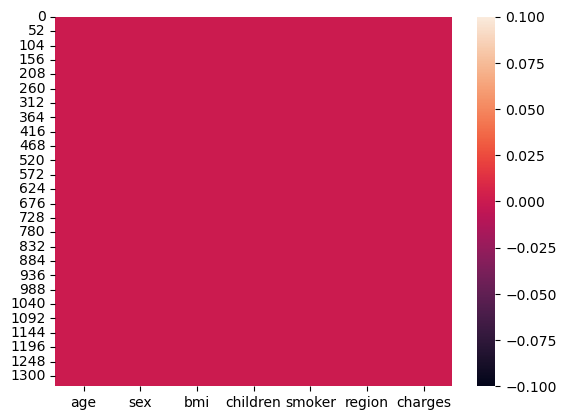

In [11]:
#Visually checking for null values
sns.heatmap(medical.isnull())

No missing values in the data..

In [96]:
#Checking for Duplicates
medical.duplicated().sum()

1

-- As we can see..we have 1 duplicate value..we can drop this value..

In [116]:
#Removing duplicates
medical_1 = medical.drop_duplicates()

In [117]:
medical_1.shape

(1337, 7)

We have dropped the row containing duplicated value..

In [118]:
#Checking for dataset info
medical_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [30]:
#Checking the number of unique values of each column
medical_1.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

## Univariate Analysis (Graphical and Non-Graphical) 

In [31]:
medical_1.describe()

age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.717450
max      64.000000    53.130000     5.000000  63770.428010

-- From the numerical data present in the dataset,we can see that:..

      1. Most of the people's age in the dataset is around 39 years..
      2. Most of the people's BMI in the dataset is around 30...
      3. Most Number of children per couple in the dataset is 1... 

Exploring Data..

In [33]:
print("Categories in 'sex' variable: ",end=" ")
print(df['sex'].unique())

print("Categories in 'smoker' variable: ",end=" ")
print(df['smoker'].unique())

print("Categories in 'region' variable: ",end=" ")
print(df['region'].unique())

Categories in 'sex' variable:  ['female' 'male']
Categories in 'smoker' variable:  ['yes' 'no']
Categories in 'region' variable:  ['southwest' 'southeast' 'northwest' 'northeast']


In [34]:
#Now we split the data into numerical and categorical columns
# Categorical variables are : 'sex' , 'smoker' and 'region'
# Numerical variables are : 'age' , 'bmi' , 'children' , 'charges'
cat_col = []
for i in medical_1.dtypes.index:
    if medical_1.dtypes[i] == "object":
        cat_col.append(i)
print("Categorical Variables: ",cat_col)

Categorical Variables:  ['sex', 'smoker', 'region']


In [35]:
num_col = []
for i in medical_1.dtypes.index:
    if medical_1.dtypes[i] != "object":
        num_col.append(i)
print("Numerical Variables: ",num_col)

Numerical Variables:  ['age', 'bmi', 'children', 'charges']


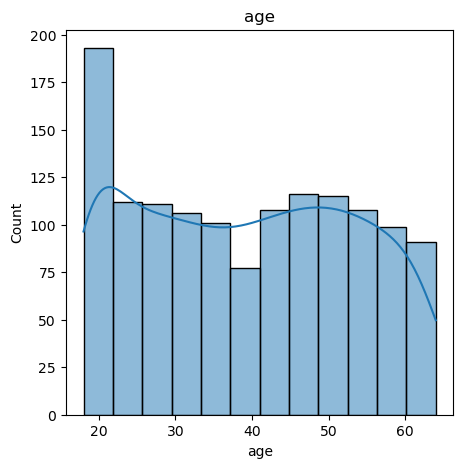

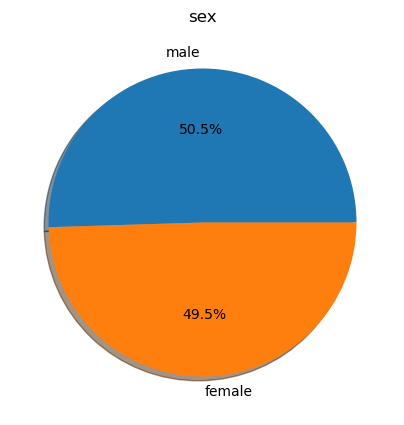

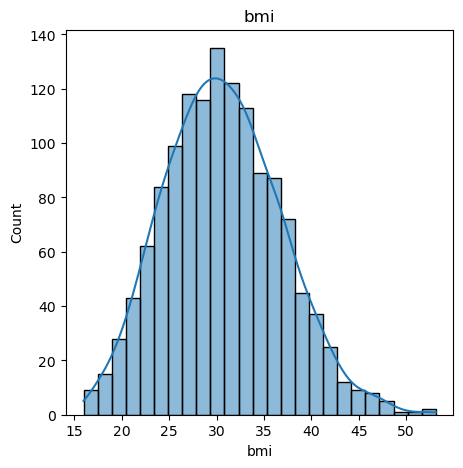

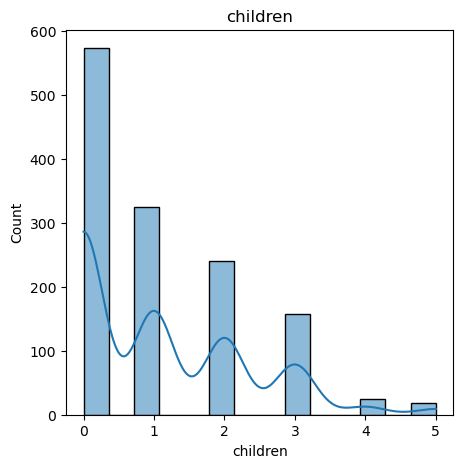

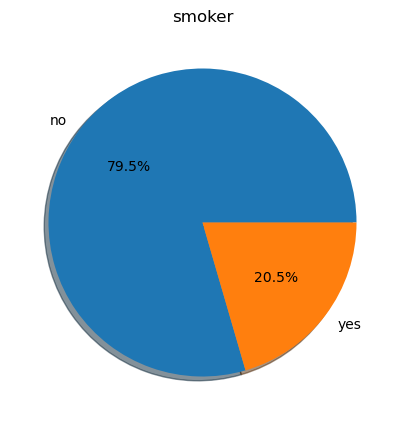

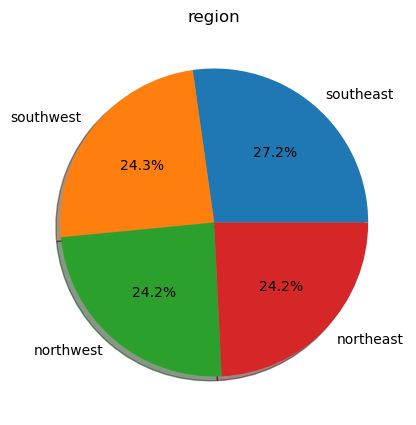

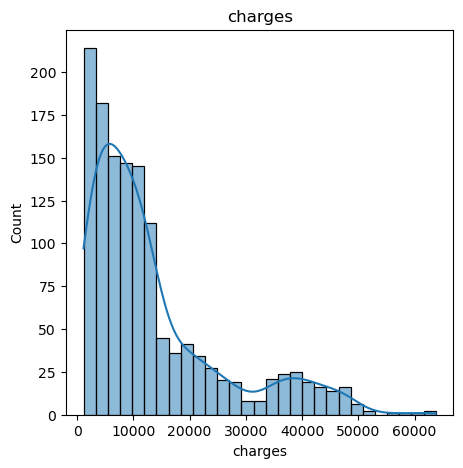

In [55]:
#Visualizing the data through pie chart and histograms for categorical and numerical data..
pie_hist_plot = []
for column in medical_1:
    plt.figure(column, figsize = (5,5))
    plt.title(column)
    if medical_1[column].dtypes != "object":
        sns.histplot(x = column,data = medical_1,kde=True)
        hist_bar_plot.append(column)
    elif medical_1[column].dtypes == "object":
        sizes = medical_1[column].value_counts()
        plt.pie(sizes.values,labels=sizes.index,autopct = '%1.1f%%',shadow=True)
        hist_bar_plot.append(column)

-- From these above graphs,we can see that:

    1. Most peolpe belong to the southeast region and the rest does not have any major difference..
    2. From the pie chart, we can see that the people who does not smoke are more than those who smoke..
    3. The histplot of age column is showing large counts at 19-21 and the rest of the plot suggesting nearly equal count for the values,it also shows that the distribution of age is not normal..
    4. The histplot of bmi column shows that the distribution is normal with a little skewness to the right..
    5. The histplot of charges column shows that it does not follow a normal ditribution..it has two humps..

## Bivariate Analysis 

-- Now we shall see how the variables(features) are related to each other and what can we derive from them..

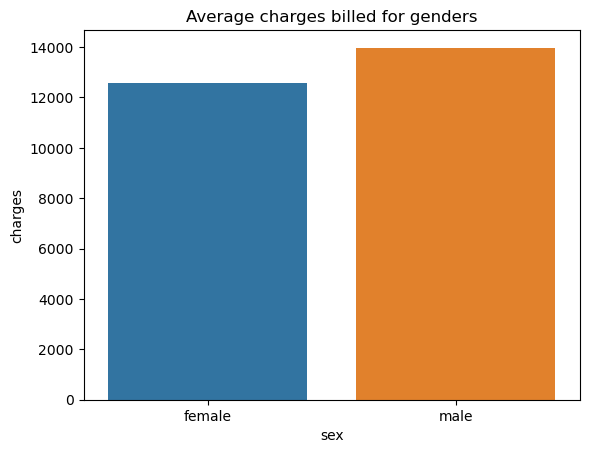

In [57]:
# Applying scatterplot,barplot so that the linear relationship between the target and independent variable becomes evident..
# 1.) Sex and Charges
sns.barplot(x='sex',y='charges',data=medical_1,ci=False)
plt.title("Average charges billed for genders")
plt.show()

-- The barplot is telling us that the average charges billed for males is greater than that of females

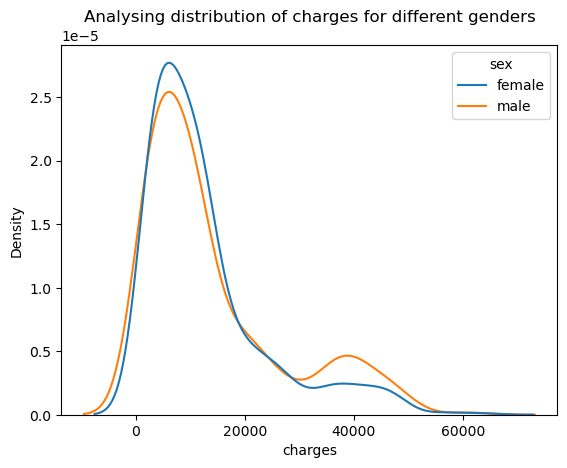

In [58]:
sns.kdeplot(x="charges",data=medical_1,hue='sex')
plt.title('Analysing distribution of charges for different genders')
plt.show()

-- By this plot, we can clearly see that there is a difference

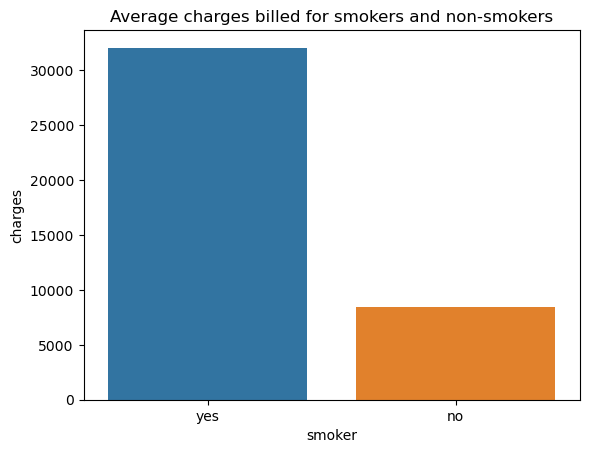

In [60]:
# 2.) Smoker and Charges
sns.barplot(x='smoker',y='charges',data=medical_1,ci=False)
plt.title("Average charges billed for smokers and non-smokers")
plt.show()

-- We can see that there is a huge difference in the average charges billed for both smoker and non-smoker..in which the former
   is billed more than the latter..

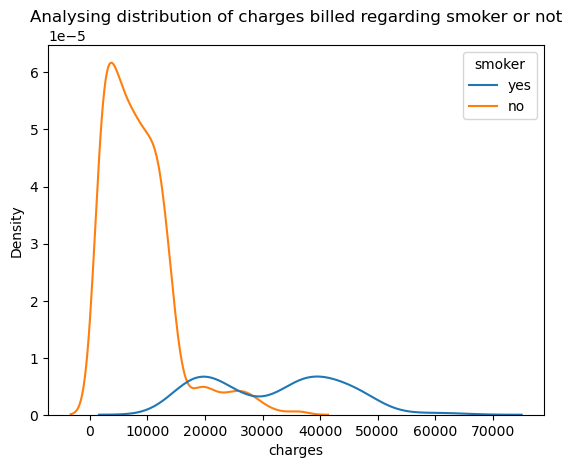

In [61]:
sns.kdeplot(x="charges",data=medical_1,hue='smoker')
plt.title('Analysing distribution of charges billed regarding smoker or not')
plt.show()

-- Therefore, from the above plot we can say that the average billing for smoker is greater than the non-smoker..

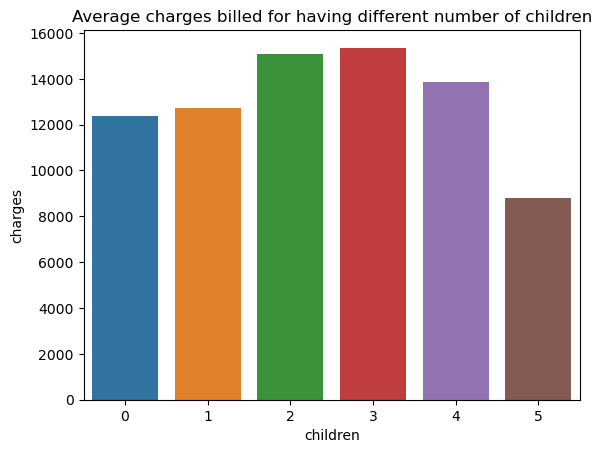

In [63]:
#3.) Children and Charges..
sns.barplot(x='children',y='charges',data=medical_1,ci=False)
plt.title("Average charges billed for having different number of children")
plt.show()

-- From the above barplot, we can say that the average charges billed having 2-3 children is slightly more than other numbers..

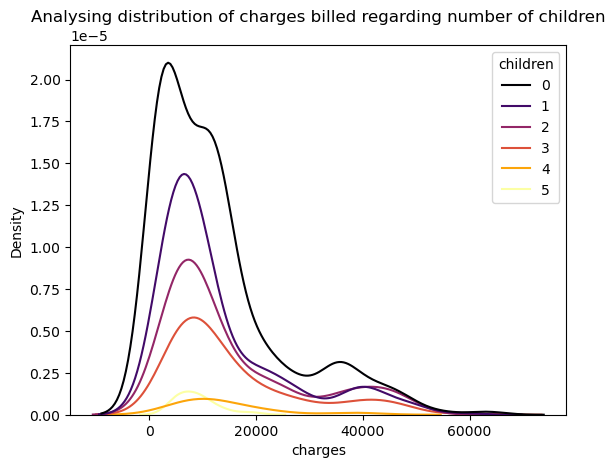

In [66]:
sns.kdeplot(x="charges",data=medical_1,hue='children',palette = "inferno")
plt.title('Analysing distribution of charges billed regarding number of children')
plt.show()

-- From the above plot, we can see that there is a significant difference in the distribution of charges billed regarding number
   of children..

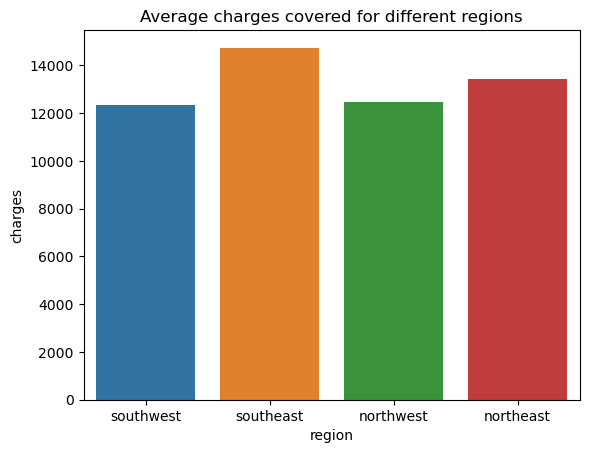

In [67]:
# 4.) Region and Charges
sns.barplot(x='region',y='charges',data=medical_1,ci=False)
plt.title("Average charges covered for different regions")
plt.show()

-- From the above barplot,we can see that the average charges covered for every region is almost same..

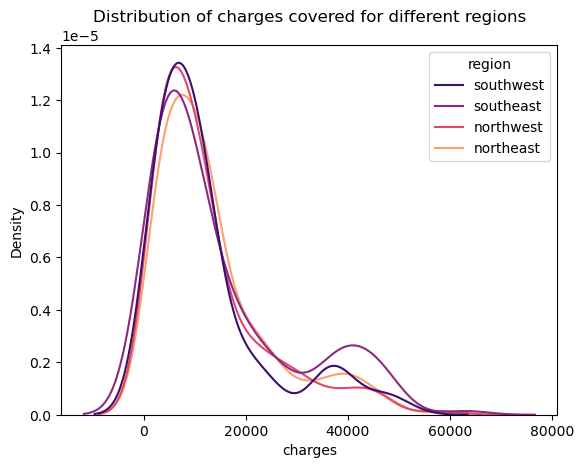

In [70]:
sns.kdeplot(x="charges",data=medical_1,hue='region',palette = "magma")
plt.title('Distribution of charges covered for different regions')
plt.show()

-- From this above plot, we see the distribution of charges covered for different charges..
   We can justify that the average charges covered for different regions is same..

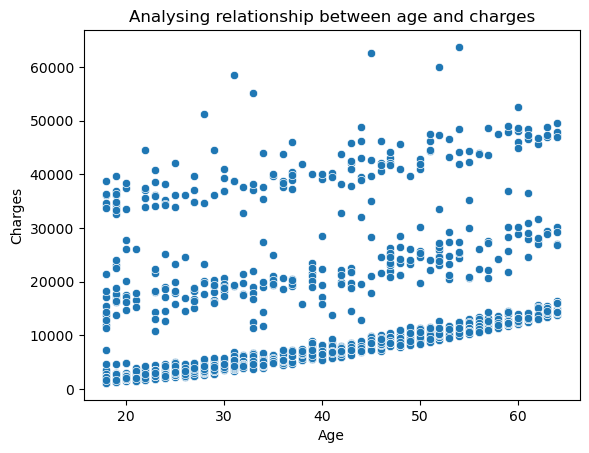

In [71]:
# 5.) Age and Charges
sns.scatterplot(x='age',y='charges',data=medical_1)
plt.title('Analysing relationship between age and charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

-- From the above scatterplot, we can say that there is a strong positive relation between age and charges..
   Ages and Charges are dependent and have linear relationship..

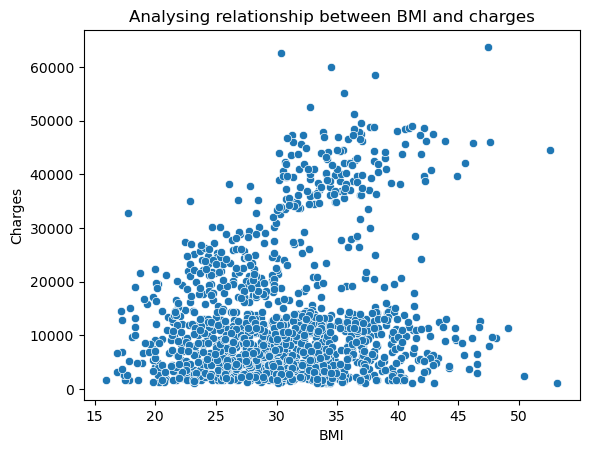

In [72]:
#6.) BMI and charges
sns.scatterplot(x='bmi',y='charges',data=medical_1)
plt.title('Analysing relationship between BMI and charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

-- From the above scatterplot, we can also say that there is a positive relation between BMI and charges.. BMI and Charges are dependent and have linear relationship..

## Multivariate Analysis 

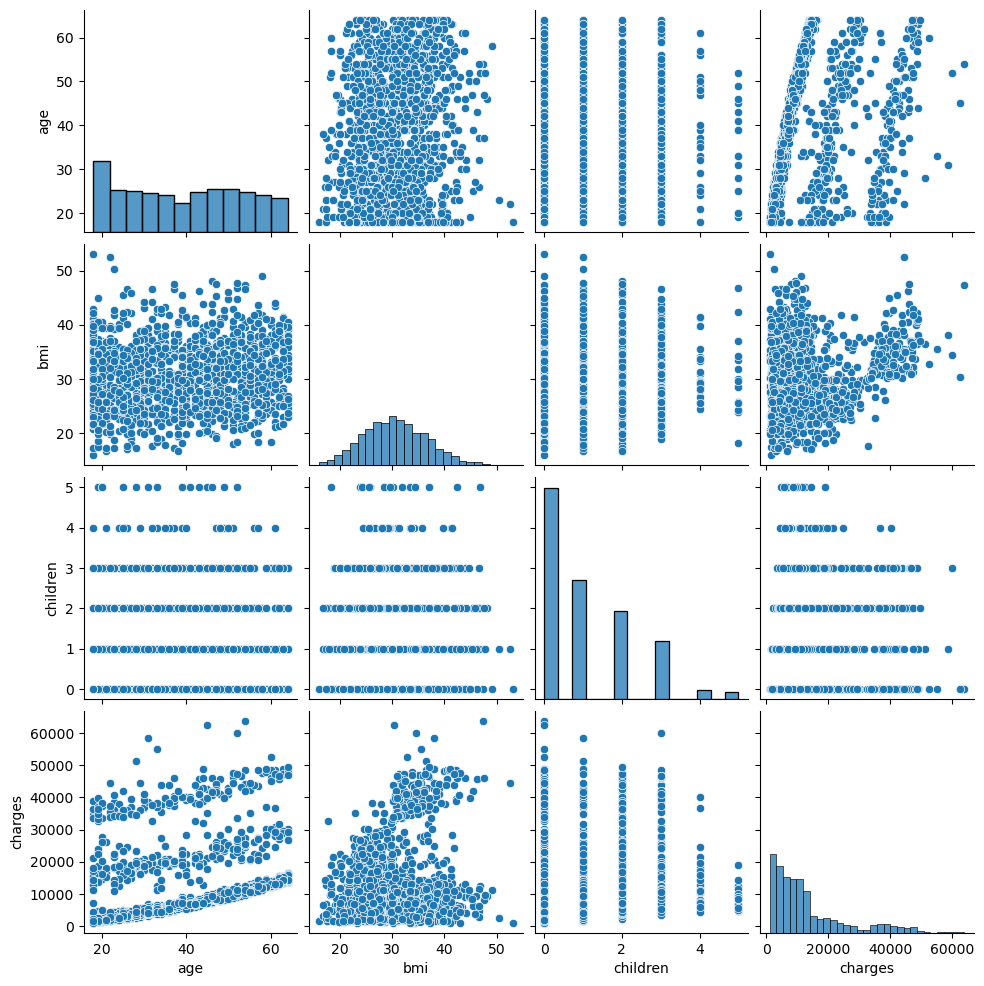

In [73]:
#Plotting the target variable against the independent variables using pairplot,so that the underlying linear relationship becomes more evident..
sns.pairplot(medical_1)

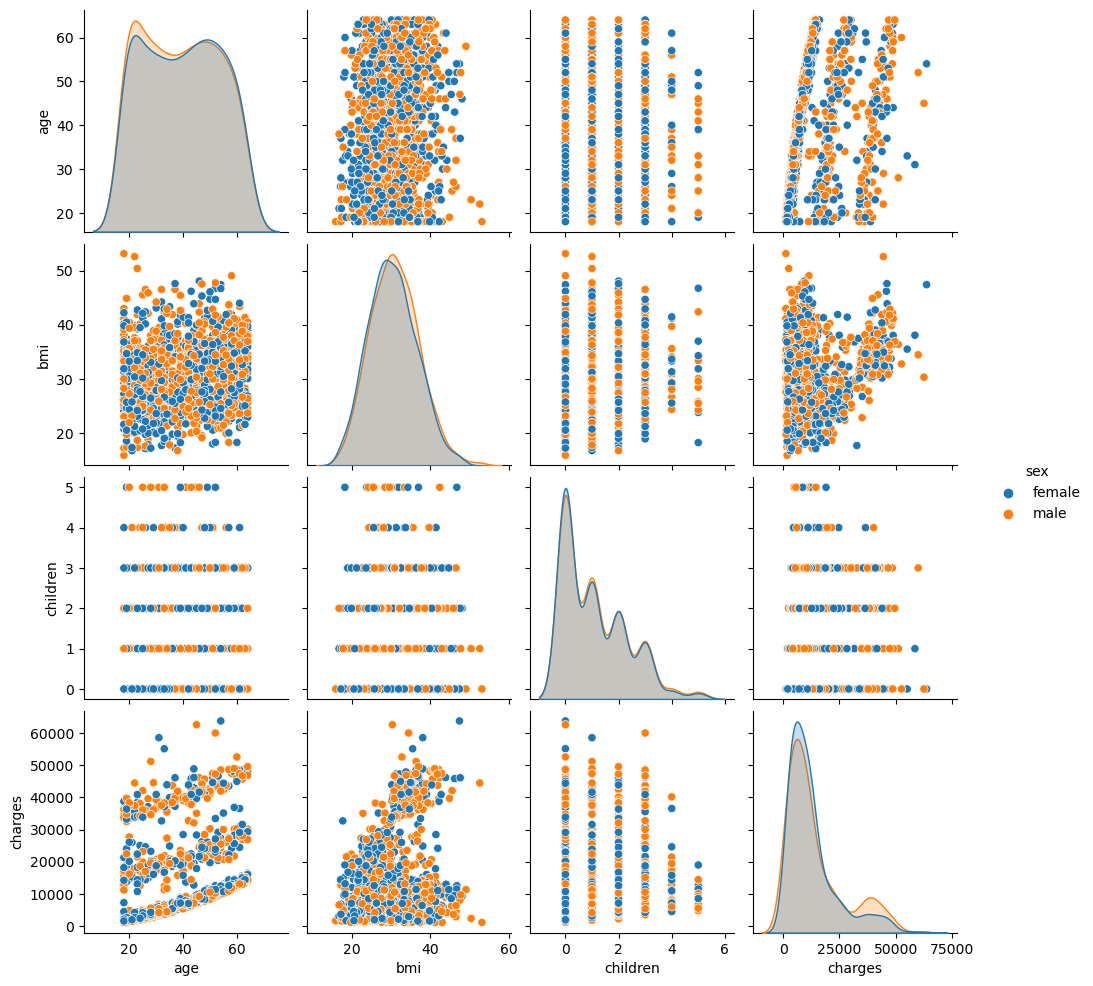

In [74]:
#Now adding the categorical variables as the legend
# 1.) Sex
sns.pairplot(medical_1,hue = 'sex')

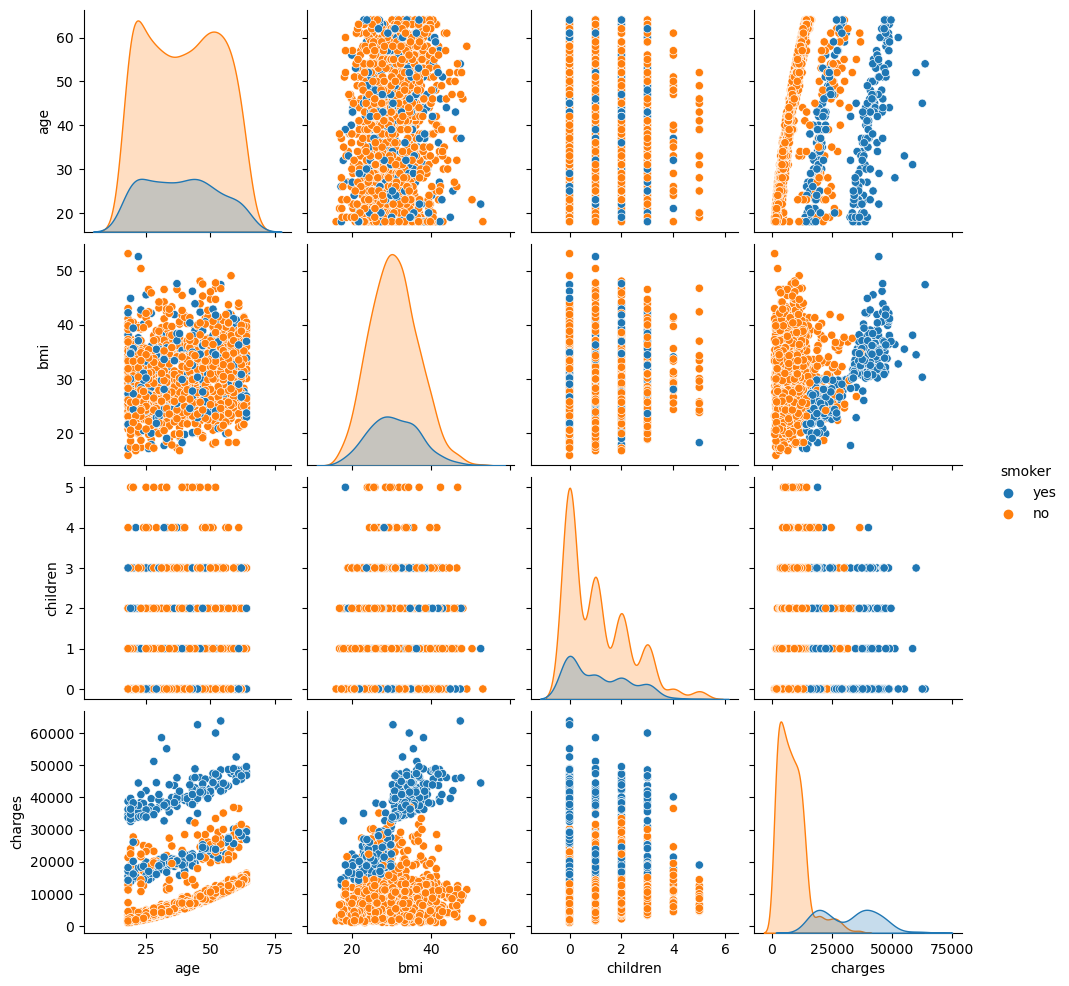

In [75]:
# 1.) Smoker
sns.pairplot(medical_1,hue = 'smoker')

-- From the above scatter plot segmented by smoker vs non-smoker,smokers have distinctively higher medical expenses...
   It also indicates that variable 'smoker' can be a strong predictor of 'charges'...

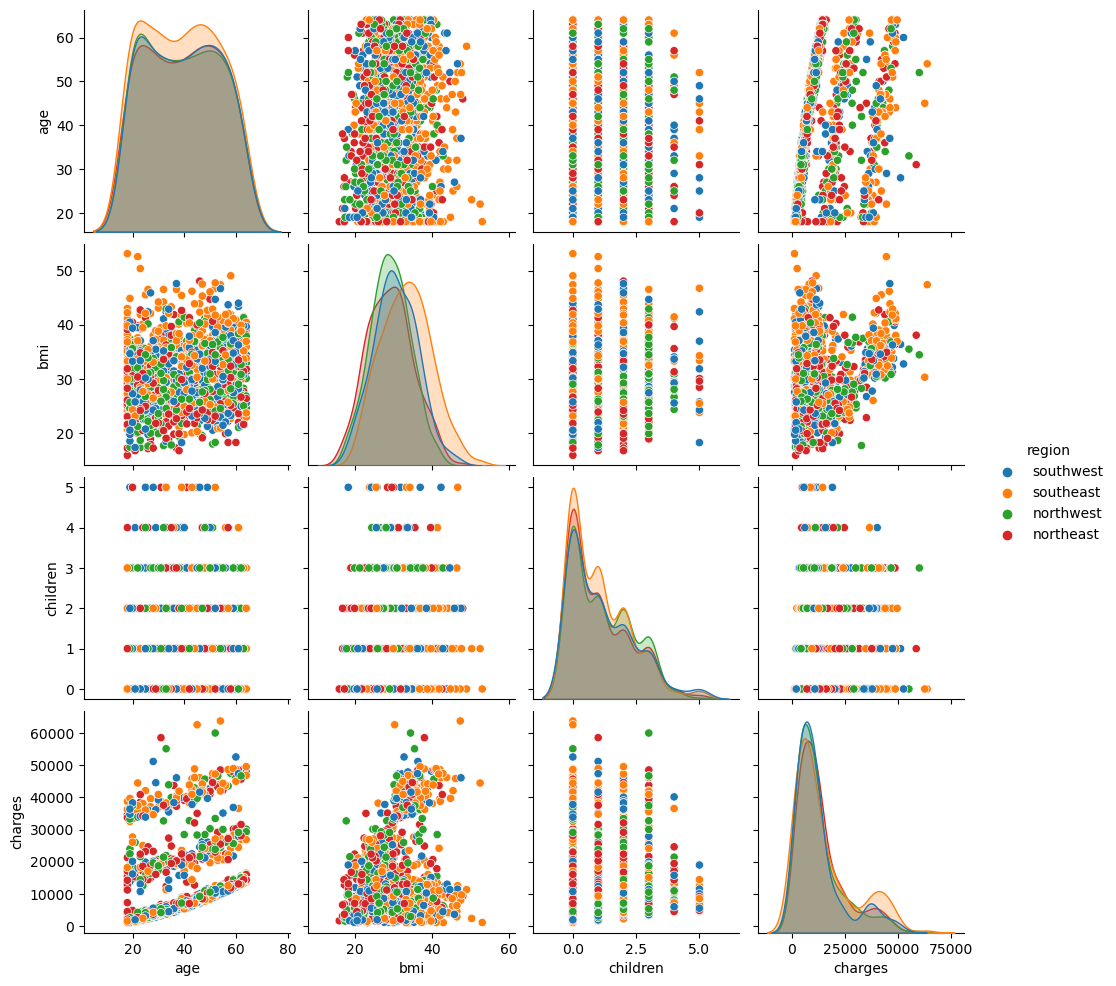

In [76]:
# 3.) Regions
sns.pairplot(medical_1,hue = 'region')

### Feature Engineering 

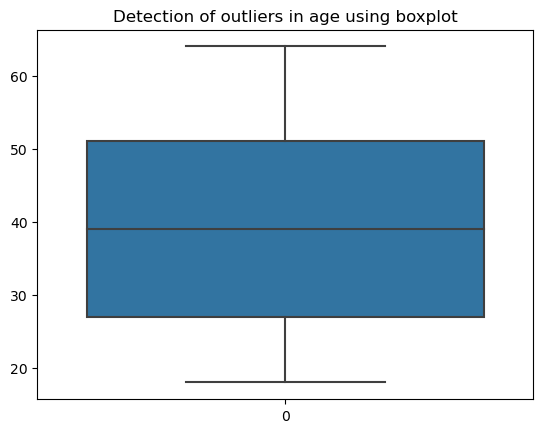

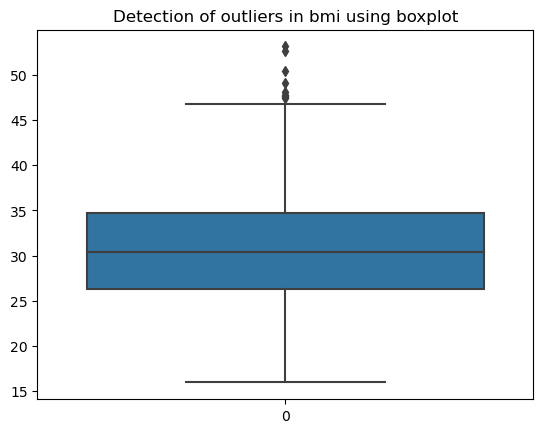

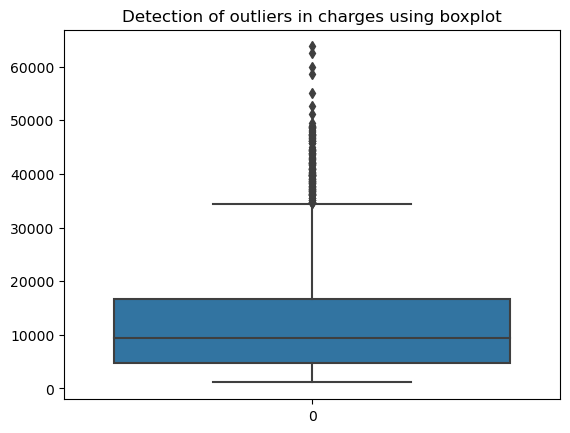

In [102]:
#Now let's detect outliers from the numerical columns and remove them only if needed..
numeric_col = ['age','bmi','charges']
for col in numeric_col:
    sns.boxplot(medical_1[col])
    plt.title('Detection of outliers in {} using boxplot'.format(col))
    plt.show()

1. The boxplot of 'age' column showed that there are no outliers..
2. The boxplot of 'bmi' column showed that there are some outliers,but we will not remove them as the data is realistic (i.e 
   a person can have a bmi of 53) which is the max bmi in the column..
3. The boxplot of charges column shows a lot of outliers,we can remove them once the charges data undergoes log transformation
   as the data points are heavily skewed..

<Axes: xlabel='charges', ylabel='Density'>

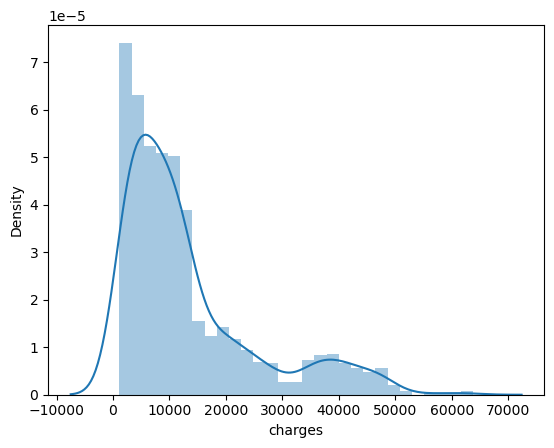

In [119]:
#As we can see the 'charges' column are heavily skewed
sns.distplot(medical_1['charges'])

In [120]:
#Normalising the 'charges' column by log transformation..
medical_1['charges'] = np.log(medical_1['charges'])

<Axes: xlabel='charges', ylabel='Density'>

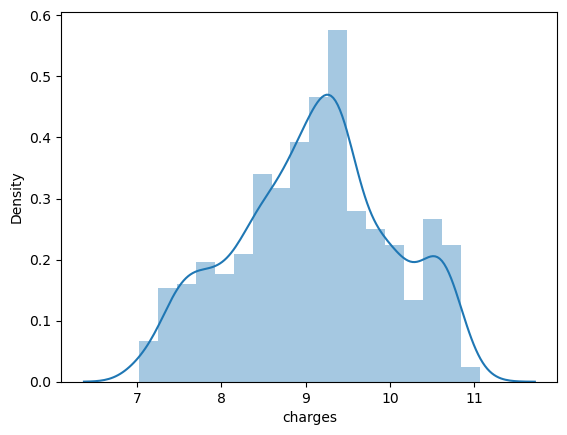

In [121]:
sns.distplot(medical_1['charges'])

<Axes: >

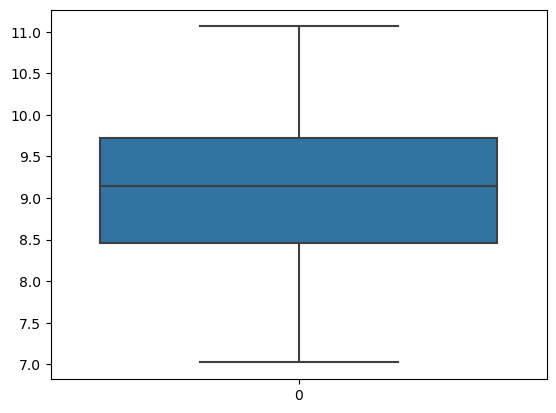

In [122]:
#Checking for outliers again for 'charges' column..
sns.boxplot(medical_1['charges'])

-- From the above boxplot, as compared to the previous boxplot..we have removed the outliers in the charges column successfully
   by log transformation..

-- LABEL ENCODING

In [123]:
#Converting the categorical variables into numerical variables
medical_1

age     sex     bmi  children smoker     region    charges
0      19  female  27.900         0    yes  southwest   9.734176
1      18    male  33.770         1     no  southeast   7.453302
2      28    male  33.000         3     no  southeast   8.400538
3      33    male  22.705         0     no  northwest   9.998092
4      32    male  28.880         0     no  northwest   8.260197
...   ...     ...     ...       ...    ...        ...        ...
1333   50    male  30.970         3     no  northwest   9.268661
1334   18  female  31.920         0     no  northeast   7.698927
1335   18  female  36.850         0     no  southeast   7.396233
1336   21  female  25.800         0     no  southwest   7.604867
1337   61  female  29.070         0    yes  northwest  10.279914

[1337 rows x 7 columns]

In [124]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
cat_col = ['sex','smoker','region']
for i in cat_col:
    medical_1[i] = LabelEncoder().fit_transform(medical_1[i])

In [125]:
medical_1

age  sex     bmi  children  smoker  region    charges
0      19    0  27.900         0       1       3   9.734176
1      18    1  33.770         1       0       2   7.453302
2      28    1  33.000         3       0       2   8.400538
3      33    1  22.705         0       0       1   9.998092
4      32    1  28.880         0       0       1   8.260197
...   ...  ...     ...       ...     ...     ...        ...
1333   50    1  30.970         3       0       1   9.268661
1334   18    0  31.920         0       0       0   7.698927
1335   18    0  36.850         0       0       2   7.396233
1336   21    0  25.800         0       0       3   7.604867
1337   61    0  29.070         0       1       1  10.279914

[1337 rows x 7 columns]

In [126]:
medical_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int32  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int32  
 5   region    1337 non-null   int32  
 6   charges   1337 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 100.2 KB


-- As we can see, all our categorical columns have been converted into numerical columns by using LabelEncoder..
   Now we can move onto modelling process, but before that let's do some correlation analysis..

-- CORRELATION ANALYSIS

In [111]:
medical_cor = medical_1.corr()
medical_cor

age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.019814  0.109344  0.041536 -0.025587  0.001626  0.526927
sex      -0.019814  1.000000  0.046397  0.017848  0.076596  0.004936  0.007009
bmi       0.109344  0.046397  1.000000  0.012755  0.003746  0.157574  0.132822
children  0.041536  0.017848  0.012755  1.000000  0.007331  0.016258  0.160336
smoker   -0.025587  0.076596  0.003746  0.007331  1.000000 -0.002358  0.665718
region    0.001626  0.004936  0.157574  0.016258 -0.002358  1.000000 -0.043393
charges   0.526927  0.007009  0.132822  0.160336  0.665718 -0.043393  1.000000

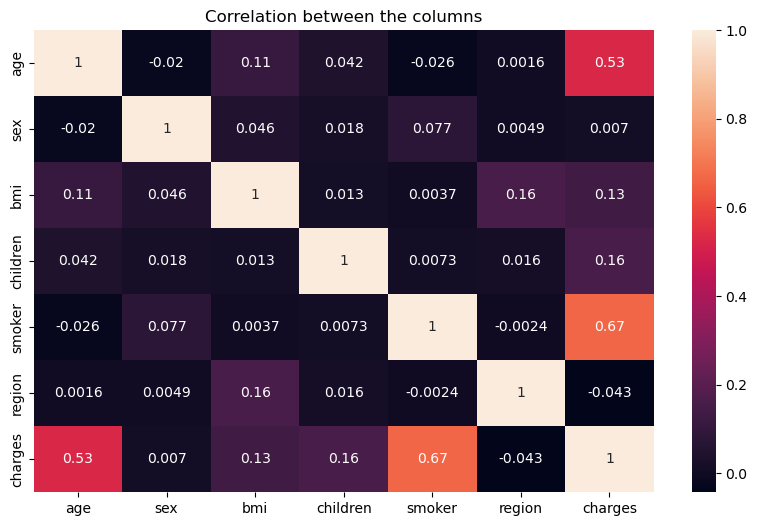

In [112]:
plt.figure(figsize=(10,6))
sns.heatmap(medical_cor, annot = True)
plt.title("Correlation between the columns")
plt.show()

-- In the above heatmap containing correlation values, we see that:
    None of the independent variables are very highly correlated with each other,hence no need to drop any variables..
    Once again, we can see that "smoker" and "age" variables are correlated pretty well with charges..

## Data Processing

In [133]:
#Splitting the dataframe into feature and target variables
# 1.) First making a copy of the dataframe..
medical = medical_1.copy()

In [134]:
medical

age  sex     bmi  children  smoker  region    charges
0      19    0  27.900         0       1       3   9.734176
1      18    1  33.770         1       0       2   7.453302
2      28    1  33.000         3       0       2   8.400538
3      33    1  22.705         0       0       1   9.998092
4      32    1  28.880         0       0       1   8.260197
...   ...  ...     ...       ...     ...     ...        ...
1333   50    1  30.970         3       0       1   9.268661
1334   18    0  31.920         0       0       0   7.698927
1335   18    0  36.850         0       0       2   7.396233
1336   21    0  25.800         0       0       3   7.604867
1337   61    0  29.070         0       1       1  10.279914

[1337 rows x 7 columns]

In [135]:
y = medical['charges']
y

0        9.734176
1        7.453302
2        8.400538
3        9.998092
4        8.260197
          ...    
1333     9.268661
1334     7.698927
1335     7.396233
1336     7.604867
1337    10.279914
Name: charges, Length: 1337, dtype: float64

In [136]:
x = medical.drop("charges",axis=1)
x

age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1337 rows x 6 columns]

-- Now we have splitted the data into feature and target variable..

   1.) target = 'charges'
   2.) features = 'age','sex','bmi','children','smoker' and 'region'
   
   Now, the data contains variables which have different scales so we are standardizing them..

In [137]:
#Using standard scaler 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [140]:
X

array([[-1.44041773, -1.00977099, -0.45315959, -0.90923416,  1.96966039,
         1.34316271],
       [-1.51164747,  0.99032355,  0.50942165, -0.07944162, -0.50770174,
         0.43801727],
       [-0.79935006,  0.99032355,  0.3831546 ,  1.58014347, -0.50770174,
         0.43801727],
       ...,
       [-1.51164747, -1.00977099,  1.01448983, -0.90923416, -0.50770174,
         0.43801727],
       [-1.29795825, -1.00977099, -0.79752426, -0.90923416, -0.50770174,
         1.34316271],
       [ 1.55123139, -1.00977099, -0.26129928, -0.90923416,  1.96966039,
        -0.46712816]])

In [138]:
# Now, Splitting the data into training and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 21)

In [139]:
print("X_train ",X_train.shape)
print("y_train ",y_train.shape)
print("X_test ",X_test.shape)
print("y_test ",y_test.shape)

X_train  (1069, 6)
y_train  (1069,)
X_test  (268, 6)
y_test  (268,)


## Model Training 

-- As this is a Regression problem, we shall predict values using all the models which fall under regression... such as Linear Regression,Decision Tree Regressor,Random Forest Regressor,Lasso and Ridge..

#### Linear Regression 

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [144]:
LR = LinearRegression()
LR.fit(X_train,y_train)
LR_pred = LR.predict(X_test)
pred_train = LR.predict(X_train)
print('R2_score:',r2_score(y_test,LR_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,LR_pred))
print('Mean Squared Error:',mean_squared_error(y_test,LR_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,LR_pred)))

R2_score: 0.7289217382753186
Mean Absolute Error: 0.27157218501237995
Mean Squared Error: 0.2038279102672903
Root Mean Squared Error: 0.4514730448955843


-- Conclusion:

    1.) MAE,MSE and RMSE - These three methods measures the errors by calculating the difference between the predicted values and the actual value..so the lesser the better..and in the case of Linear regression it is very less..
    2.) r2 score - (coefficient of determination- ranges from 0 to 1)..in this case..R squared value is 0.72 which explains 72% of variation in target variable, which is a good rate...

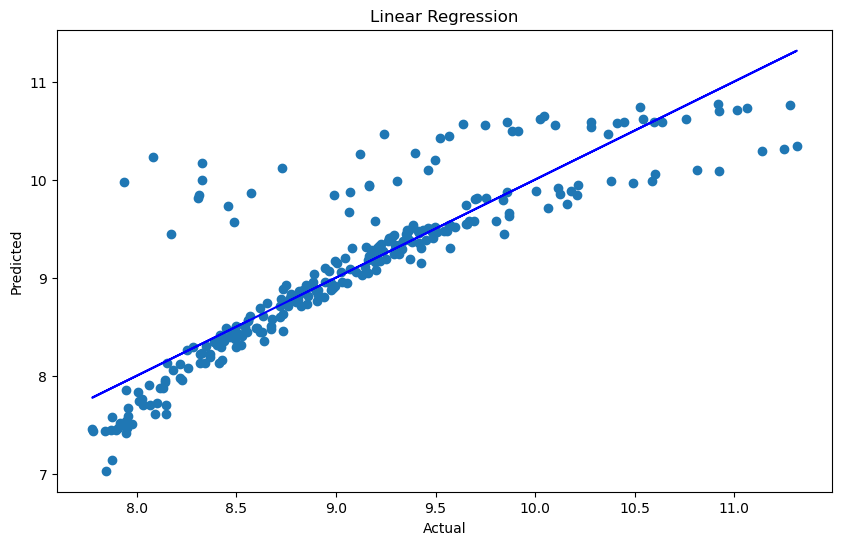

In [145]:
plt.figure(figsize=(10,6))
plt.scatter(x=LR_pred,y=y_test)
plt.plot(LR_pred,LR_pred,color = 'b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')
plt.show()

#### Decision Tree Regressor 

In [147]:
from sklearn.tree import DecisionTreeRegressor

In [148]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
dtr_pred = dtr.predict(X_test)
pred_train = dtr.predict(X_train)
print('R2_score:',r2_score(y_test,dtr_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,dtr_pred))
print('Mean Squared Error:',mean_squared_error(y_test,dtr_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,dtr_pred)))

R2_score: 0.6986726378063827
Mean Absolute Error: 0.20150792869722045
Mean Squared Error: 0.22657267370505568
Root Mean Squared Error: 0.47599650597988186


Conclusion:

    1.) MAE,MSE and RMSE - These three methods measures the errors by calculating the difference between the predicted values and the actual value..so the lesser the better..and in the case of Decision Tree Regressor it is very less..almost similar to Linear Regression..
    2.) r2 score - (coefficient of determination- ranges from 0 to 1)..in this case..R squared value is around 0.69 which explains 69% of variation in target variable, which is an ok rate a lot lesser than Linear regression..

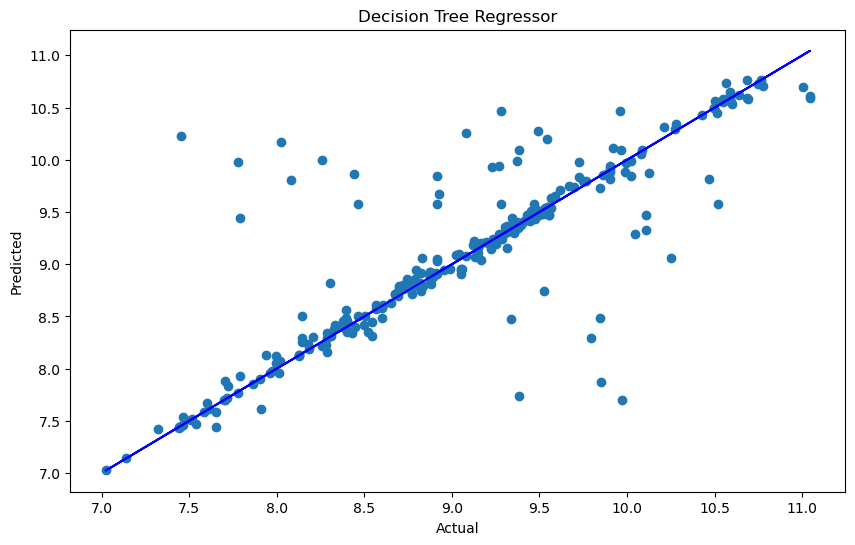

In [149]:
plt.figure(figsize=(10,6))
plt.scatter(x=dtr_pred,y=y_test)
plt.plot(dtr_pred,dtr_pred,color = 'b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regressor')
plt.show()

#### Random Forest Regressor 

In [150]:
from sklearn.ensemble import RandomForestRegressor

In [151]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_pred = rfr.predict(X_test)
print('R2_score:',r2_score(y_test,rfr_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,rfr_pred))
print('Mean Squared Error:',mean_squared_error(y_test,rfr_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rfr_pred)))

R2_score: 0.7874847494598309
Mean Absolute Error: 0.18980722884452408
Mean Squared Error: 0.15979348230263632
Root Mean Squared Error: 0.39974176952457235


Conclusion:

    1.) MAE,MSE and RMSE - These three methods measures the errors by calculating the difference between the predicted values and the actual value..so the lesser the better..and in the case of Random Forest Regressor it is very very less as compared to the before two models..it's a good sign
    2.) r2 score - (coefficient of determination- ranges from 0 to 1)..in this case..R squared value is around 0.78 which explains 78% of variation in target variable, which is a really good rate as compared to both Linear and Decision Tree regressor..by far the best model..

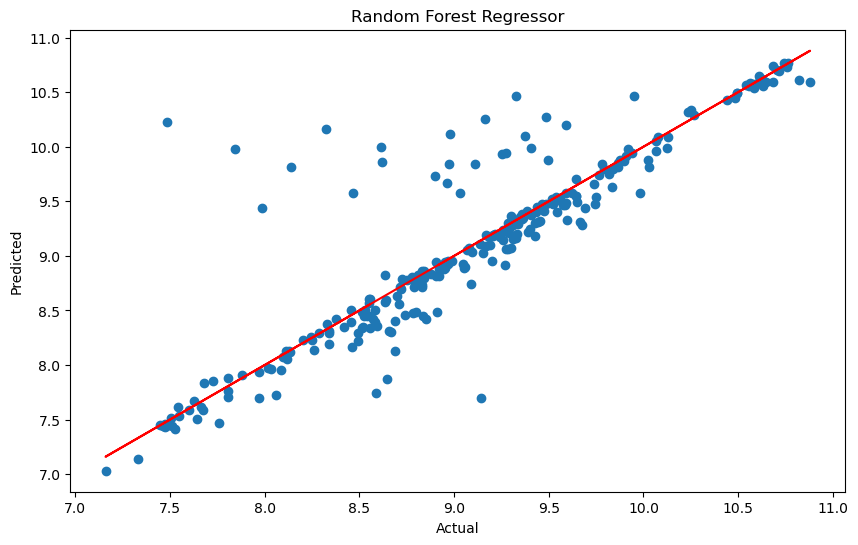

In [152]:
plt.figure(figsize=(10,6))
plt.scatter(x=rfr_pred,y=y_test)
plt.plot(rfr_pred,rfr_pred,color = 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regressor')
plt.show()

#### Lasso and Ridge Regressor 

In [153]:
from sklearn.linear_model import Lasso,Ridge

In [161]:
l = Lasso()
l.fit(X_train,y_train)
l_pred = l.predict(X_test)
print('R2_score:',r2_score(y_test,l_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,l_pred))
print('Mean Squared Error:',mean_squared_error(y_test,l_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,l_pred)))

R2_score: -1.3819470586096116e-05
Mean Absolute Error: 0.7089401493683615
Mean Squared Error: 0.7519257566588649
Root Mean Squared Error: 0.867136527116039


In [162]:
r = Ridge()
r.fit(X_train,y_train)
r_pred = r.predict(X_test)
print('R2_score:',r2_score(y_test,r_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,r_pred))
print('Mean Squared Error:',mean_squared_error(y_test,r_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,r_pred)))

R2_score: 0.7289991420106985
Mean Absolute Error: 0.2716542270511467
Mean Squared Error: 0.20376970920930434
Root Mean Squared Error: 0.4514085834466424


Conclusion:

    1.) MAE,MSE and RMSE - These three methods measures the errors by calculating the difference between the predicted values and the actual value..so the lesser the better..and in the case of Lasso it is very very high as compared to all the above models..and in the case of Ridge it is similar to Linear and Decision Tree regressor..
    2.) r2 score - (coefficient of determination- ranges from 0 to 1)..in this case..R squared value is around -0.001 or something which explains a really bad score,in the case..of Ridge..R squared value is around 0.72 which explains 72% of variation in target variable, which is a good rate... which is a similar rate as compared to both Linear and Decision Tree regressor..

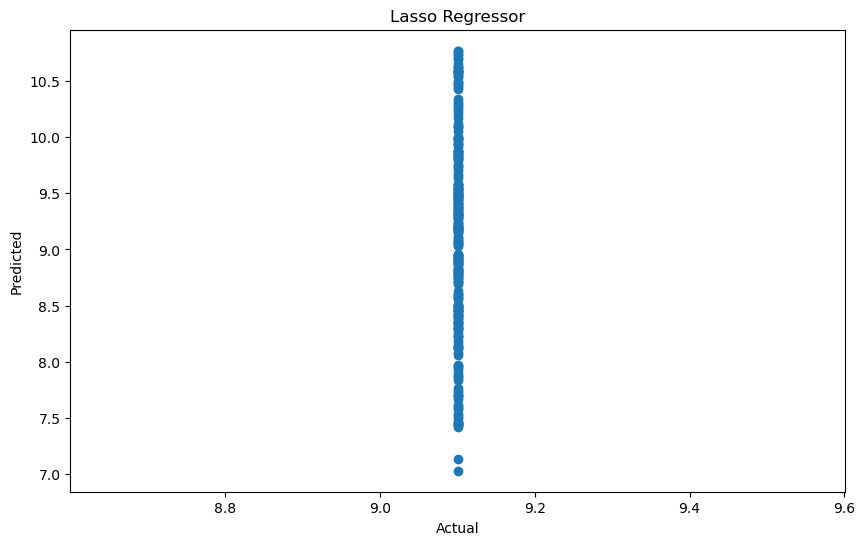

In [163]:
plt.figure(figsize=(10,6))
plt.scatter(x=l_pred,y=y_test)
plt.plot(l_pred,l_pred,color = 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regressor')
plt.show()

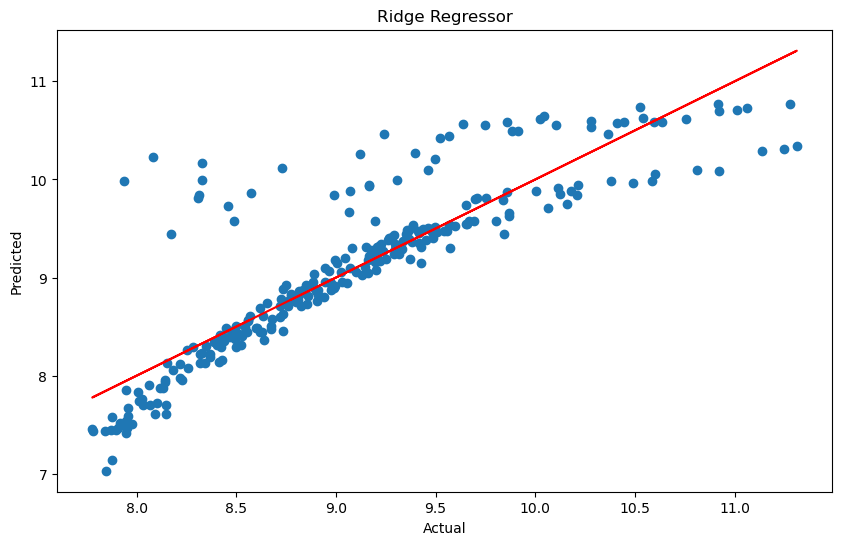

In [164]:
plt.figure(figsize=(10,6))
plt.scatter(x=r_pred,y=y_test)
plt.plot(r_pred,r_pred,color = 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regressor')
plt.show()

##### Cross - Validation Score

In [165]:
from sklearn.model_selection import cross_val_score

In [171]:
score = cross_val_score(LR,X,y,scoring = 'r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,LR_pred) - score.mean())*100)

[0.7983361  0.68796418 0.83082483 0.7668188  0.73258699]
0.7633061787768669
Difference between R2 score and cross validation score is -  -3.438444050154832


In [172]:
score = cross_val_score(dtr,X,y,scoring = 'r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,dtr_pred) - score.mean())*100)

[0.73153442 0.57439118 0.63644736 0.72727563 0.69138259]
0.6722062356491358
Difference between R2 score and cross validation score is -  2.6466402157246827


In [173]:
score = cross_val_score(rfr,X,y,scoring = 'r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,rfr_pred) - score.mean())*100)

[0.85070526 0.7054692  0.86511689 0.82106104 0.79048564]
0.8065676065369873
Difference between R2 score and cross validation score is -  -1.90828570771564


In [174]:
score = cross_val_score(l,X,y,scoring = 'r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,l_pred) - score.mean())*100)

[-1.14678318e-07 -2.41586625e-06 -8.68580475e-04 -8.55631581e-05
 -4.82722050e-04]
-0.0002878792455434542
Difference between R2 score and cross validation score is -  0.02740597749573581


In [175]:
score = cross_val_score(r,X,y,scoring = 'r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,r_pred) - score.mean())*100)

[0.7982951  0.68808942 0.83068226 0.7668516  0.73262827]
0.7633093306943839
Difference between R2 score and cross validation score is -  -3.4310188683685405


Conclusion:

    1.) We will choose Random Forest Regressor as our best performing model..because compared to other models..The R2 scores with k-fold value of 5 is better in Random Forest regressor..even the Average score is also better..
    2.) Therefore, Random Forest Regressor is the model we will be choosing to predict values..we will perform some hyper-parameter tuning to improve model performance..

##### Hyper Parameter Tuning 

In [194]:
param = {"n_estimators":[100,200,300],"max_features":['sqrt','log2'],"criterion":['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],"max_depth":[2,4],"min_samples_split":[2,5],"min_samples_leaf":[1,2]}
rfr = RandomForestRegressor()

In [195]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = rfr,param_grid = param,cv=3)

In [196]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [2, 4], 'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]})

In [197]:
grid_search.best_params_

{'criterion': 'absolute_error',
 'max_depth': 4,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [244]:
Final_model = RandomForestRegressor(criterion = 'absolute_error',max_depth = 10,max_features = 'log2',min_samples_leaf = 1,min_samples_split = 1,n_estimators = 500)
Final_model.fit(X_train,y_train)
fm_pred = Final_model.predict(X_test)
print('R2_score:',r2_score(y_test,fm_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,fm_pred))
print('Mean Squared Error:',mean_squared_error(y_test,fm_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,fm_pred)))

R2_score: 0.797174328270643
Mean Absolute Error: 0.19396618556037715
Mean Squared Error: 0.1525077391087245
Root Mean Squared Error: 0.3905223925829664


-- By numerous trial and error, by hyper parameter tuning..we have increased the r2_score slightly..
   Therefore,we can save this model as the final model..and also save this model..for prediction purposes..

## Saving the Model 

In [245]:
import joblib
joblib.dump(Final_model,"Medical_cost_insurance_project.pkl")

['Medical_cost_insurance_project.pkl']

In [246]:
model = joblib.load("Medical_cost_insurance_project.pkl")
prediction = model.predict(X_test)
prediction

array([ 8.54860413,  7.88771906, 10.01074402,  9.98188831,  9.07797373,
        8.87508481, 10.10001563,  8.45643669, 10.5240101 ,  8.69136421,
        9.74162226,  8.5907813 ,  9.37932781,  7.43517888, 10.6131715 ,
        9.18305305,  9.3243433 ,  8.92729546, 10.40056577,  8.11662016,
        8.5772588 ,  8.83336621, 10.11001713,  9.04444862,  7.58925915,
        8.78669007,  8.86877202, 10.52851133,  9.30924312,  8.59826027,
        8.13742921,  9.34679331,  8.02940803,  9.24879566,  8.45409275,
        8.91534797,  8.11167761,  9.21851222,  8.98734057,  8.55429055,
        9.14591954,  8.83541358, 10.68526037, 10.51967571,  9.38795072,
        7.70043054,  9.31794689, 10.50339692,  8.55459539,  8.84918935,
        8.96185027,  8.59021496,  9.3829874 ,  9.88144794,  9.27793441,
        9.26865415, 10.35112068,  8.8085641 ,  9.38929431,  9.14168906,
        7.6955499 ,  8.34396827,  9.41515912,  9.2213864 , 10.01280925,
        9.29209582,  8.10354239,  9.38004183,  8.60432442,  9.18

In [247]:
b = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = prediction
df['Original'] = b
df

Predicted   Original
0     8.548604   8.569096
1     7.887719   7.835112
2    10.010744   9.870467
3     9.981888   9.941440
4     9.077974   8.902203
..         ...        ...
263   9.968348   9.915162
264   9.006523   8.926213
265  10.425869  10.586881
266  10.299173  10.565987
267   8.825554   8.811383

[268 rows x 2 columns]

Text(0.5, 1.0, 'Actual vs Predicted values')

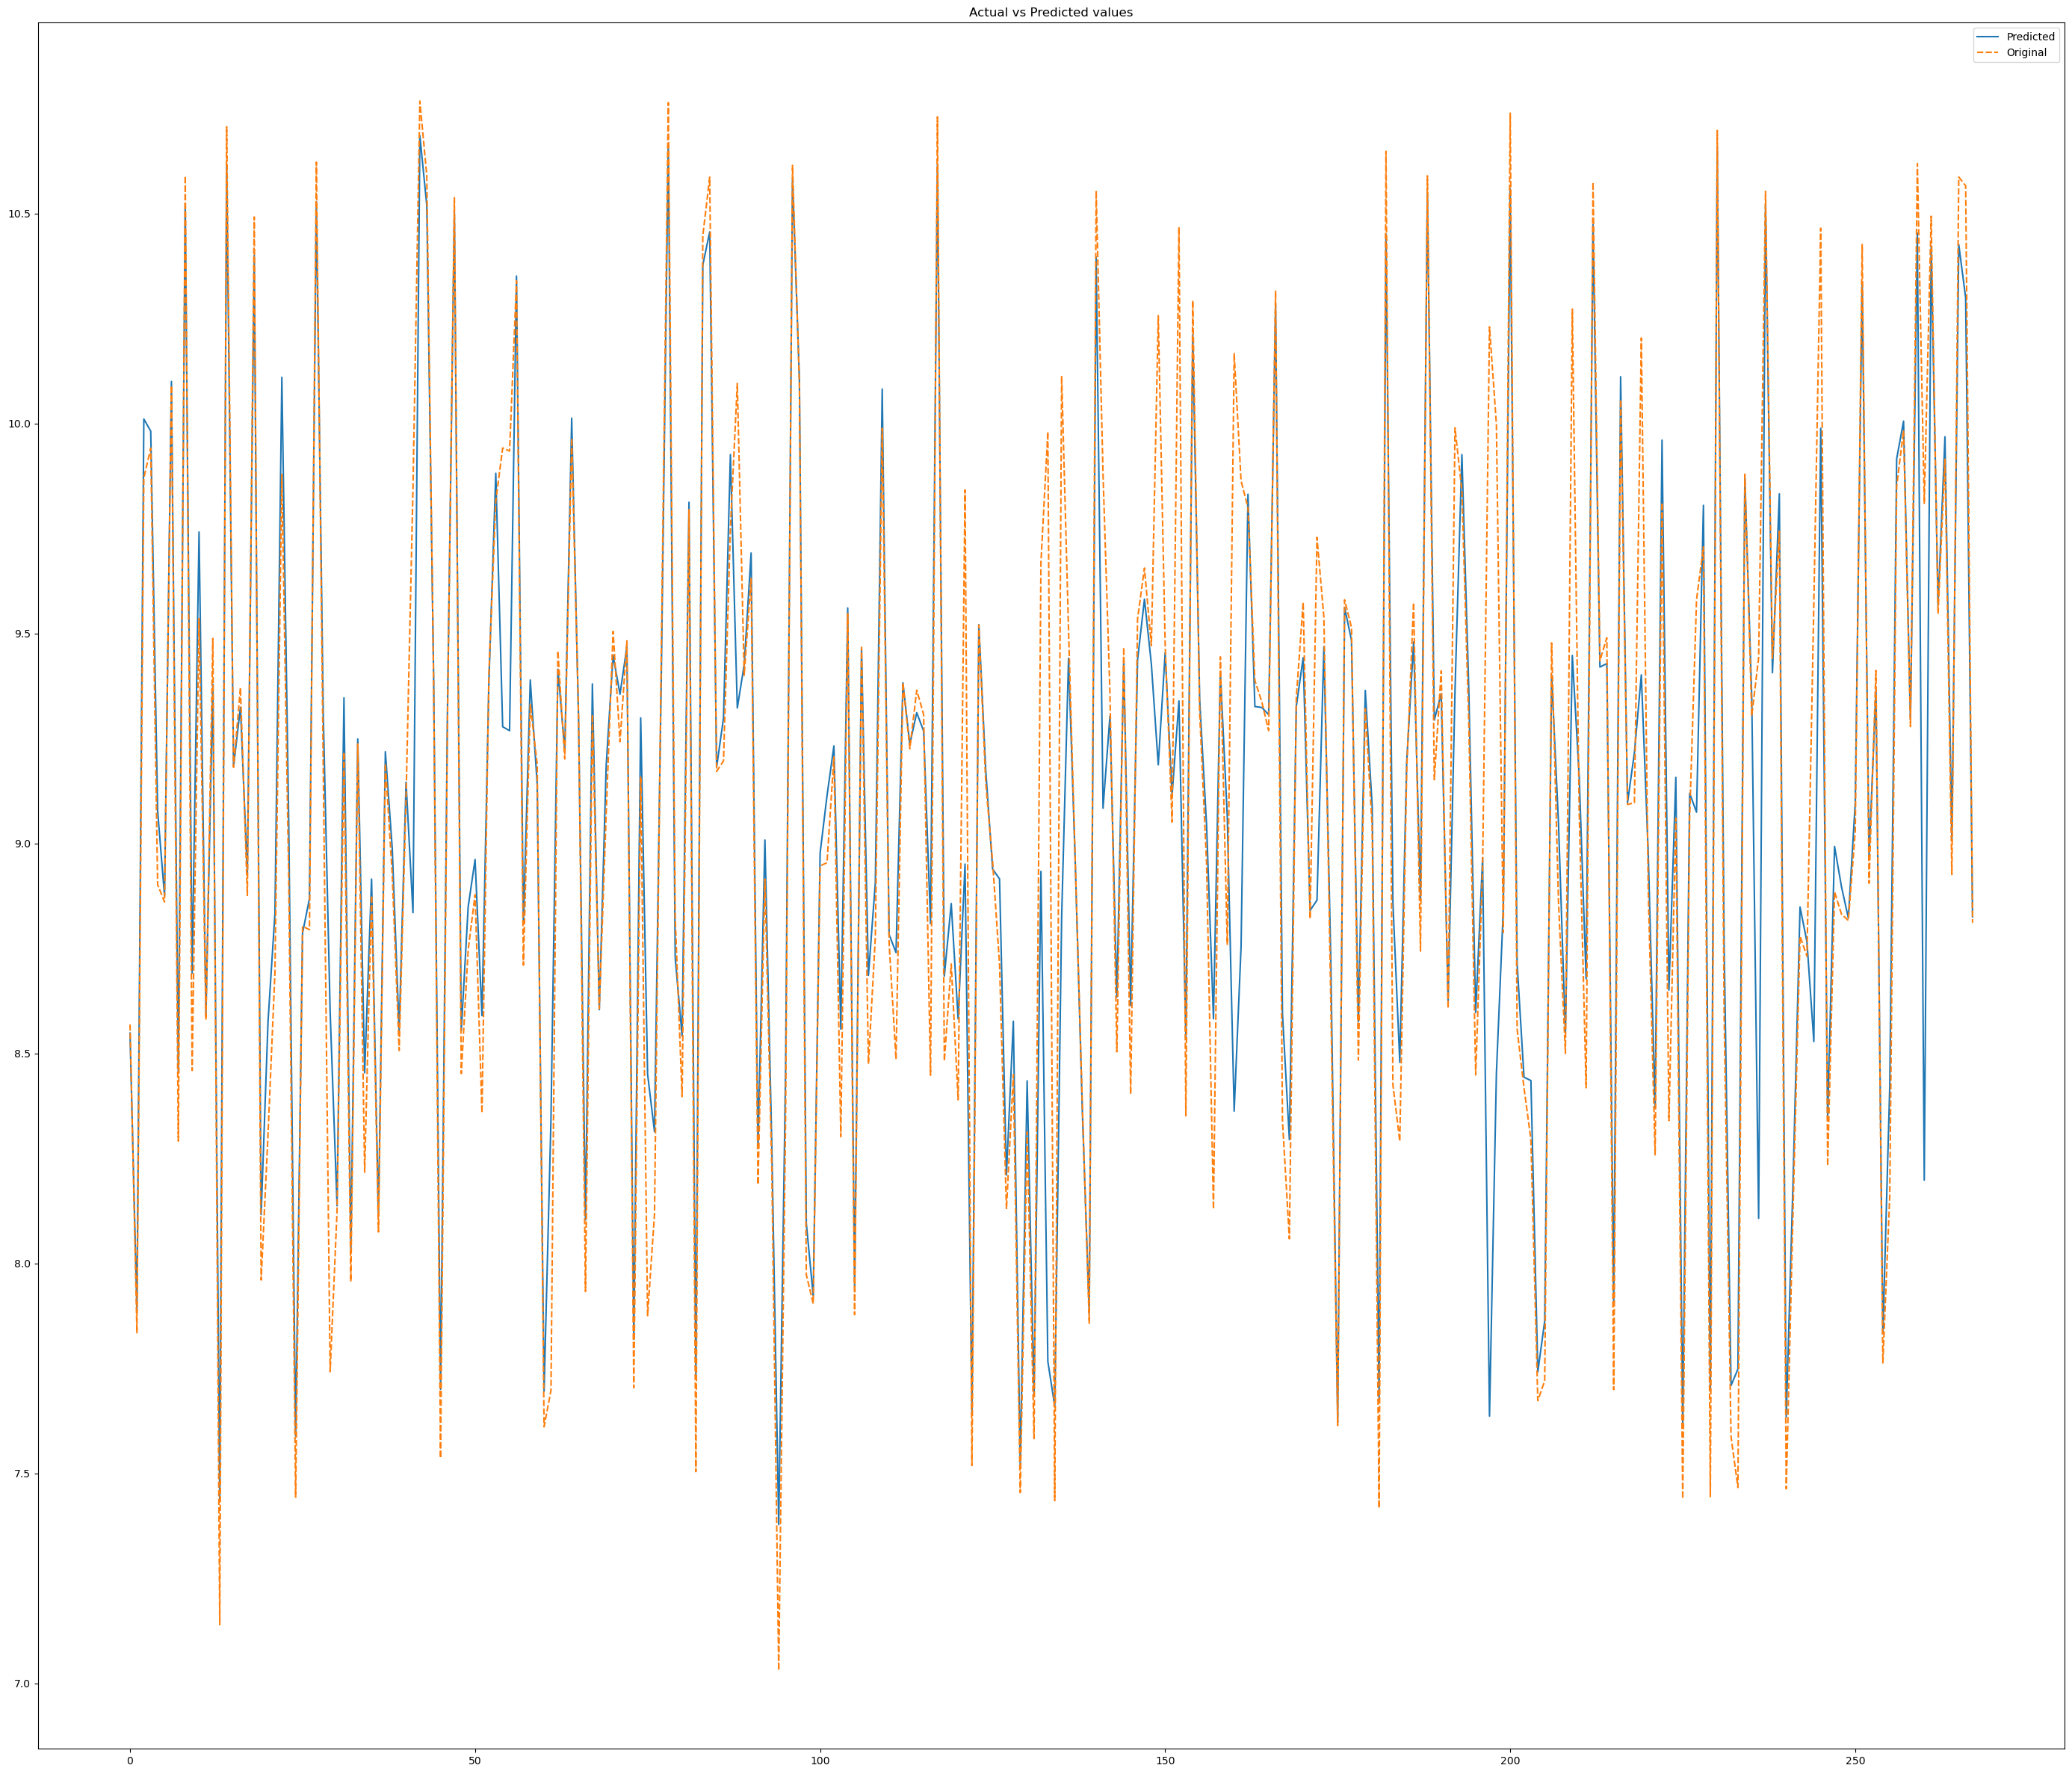

In [253]:
#Visually representing the actual vs predicted values..
plt.figure(figsize=(35,30))
sns.lineplot(data=df)
plt.title('Actual vs Predicted values')